In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
import requests as re
import re # for regex
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [228]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
#df_reviews = pd.read_csv('../dataset/Reviews.csv')
df_reviews = pd.read_csv('../dataset/out.csv')
df_reviews.shape

(999, 10)

In [229]:
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [230]:
df_reviews.shape

(999, 10)

In [231]:
df_reviews = df_reviews.dropna()

In [232]:
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [233]:
df_reviews.shape

(999, 10)

In [234]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [235]:
df_reviews.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [236]:
df_reviews['Score'].value_counts()

5    642
4    138
1     98
2     46
Name: Score, dtype: int64

In [237]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [238]:
df_reviews["negative"].value_counts()

0    780
1    144
Name: negative, dtype: int64

In [239]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.If you are looking for the secret in

In [240]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [241]:
import string
from collections import Counter
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]

freqdist = Counter(list_words)
freqdist.most_common(20)

[('chips', 518),
 ('br', 409),
 ('like', 378),
 ('good', 284),
 ('great', 252),
 ('taste', 250),
 ('flavor', 242),
 ('one', 228),
 ('love', 195),
 ('food', 194),
 ('tea', 175),
 ('bag', 171),
 ('best', 166),
 ('product', 164),
 ('kettle', 151),
 ('really', 147),
 ('would', 138),
 ('use', 133),
 ('much', 130),
 ('get', 130)]

In [242]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

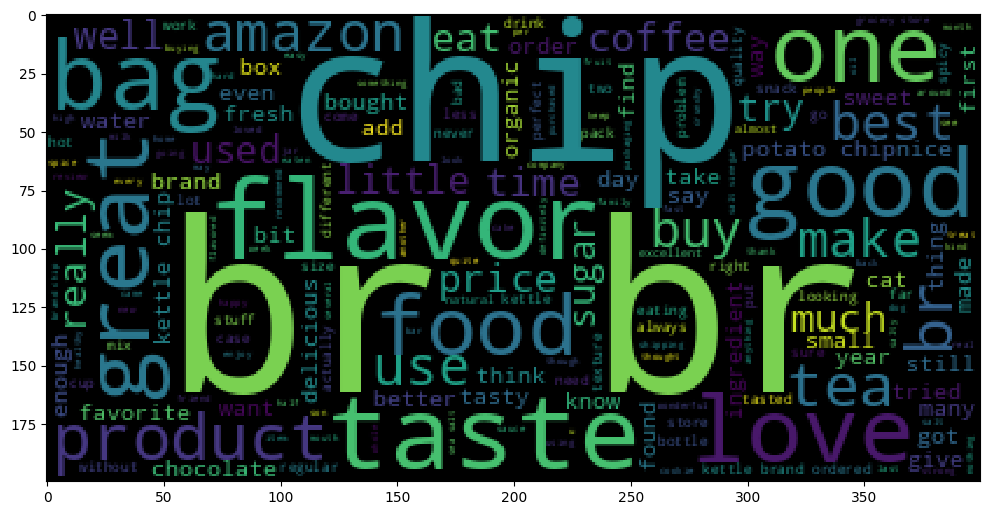

In [243]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()